In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# 모델 훈련

#### 선형 회귀 모델을 훈련시키는 두 가지 방법
* 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구한다.
* 반복적인 최적화 방식인 경사 하강법(GD)을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다.  
    * 결국 앞의 방법과 동일한 파라미터로 수렴한다.

# 1. 선형 회귀

#### 선형 회귀 모델의 예측
$$ \hat y = \theta_0 + \theta_1x_1 + \dots + \theta_nx_n $$
* $\hat y$ : 예측값
* $n$ : 특성 수
* $x_i$ : $i$번째 특성값
* $\theta_j$ : $j$번째 모델 파라미터 (편향 $\theta_0$과 특성의 가중치 $\theta_1, \theta_2, \dots, \theta_n$을 포함한다).
    
#### 선형 회귀 모델의 예측(벡터 형태)
$$ \hat y = h_{\theta}(\mathbf x) = \theta^T \cdot \mathbf x $$
* $\theta$ : 편향 $\theta_0$과 특성 가중치 $\theta_1, \dots, \theta_n$를 담고 있는 모델의 파라미터 벡터
* $\theta^T$ : $\theta$의 전치(열 벡터가 아닌 행 벡터)
* $\mathbf x$ : $x_0 \dots x_n$을 담고 있는 샘플의 **특성 벡터**
    * $x_0$는 항상 1이다.
    > 편의상 벡터 표현으로 모델 파라미터와 특성을 모두 표현하기 위해 편향 $\theta_0$에 가상의 특성 $x_0 = 1$이 곱해졌다고 생각한다.
* $\theta^T \cdot \mathbf x$ : $\theta^T$와 $\mathbf x$의 점곱
* $h_{\theta}$ : 모델 파라미터 $\theta$를 사용한 가설(hypothesis) 함수

#### 모델 훈련
모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다.  
이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다.
* 선형 회귀 모델을 훈련시키려면 RMSE(평균 제곱근 오차, 회귀에 가장 널리 사용되는 성능 측정 지표)를 최소화하는 $\theta$를 찾아야 한다.
* 실제로는 MSE(Mean Square Error)를 최소화하는 것이 같은 결과를 내면서(어떤 함수를 최소화하는 것은 그 함수의 제곱근을 최소화하는 것과 같으므로) 더 간단하다.
> 최종 모델을 평가하는 데 사용하는 성능 측정 지표말고 학습 알고리즘이 다른 함수를 최적화하는 경우가 종종 있다.  
일반적으로 성능 측정 지표에는 없는 유용한 미분 특성이 있어서 이런 함수가 계산하기 더 쉽거나, (4.5절 규제 모델 참조)훈련하는 동안 모델에 제약을 가하기 위해 사용한다.

#### 훈련 세트 $\mathbf X$에 대한 선형 회귀 가설 $h_{\theta}$의 MSE 비용 함수
$$ \mbox{MSE}(\mathbf X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^m(\theta^T \cdot \mathbf x^i - y^i)^2 $$
* 모델이 파라미터 벡터 $\theta$를 가진다는 것을 명확히 하려고 $h_{\theta}$를 사용한다.
* 간단하게 표기하기 위해 $\mbox{MSE}(\mathbf X, h_{\theta})$ 대신 $\mbox{MSE}(\theta)$라고 쓸 것이다.

> **비용함수**  
최적화를 위해 사용되는 조건의 스칼라 측정 (제타위키 참조)

## 1.1. 정규방정식
* **정규방정식**(Normal Equation) : 비용 함수를 최소화하는 $\theta$값을 찾기 위한 **해석적인 방법**. 다른 말로 하면 바로 결과를 얻을 수 있는 수학 공식

#### 정규방정식
$$ \hat \theta = (\mathbf X^T \cdot \mathbf X)^{-1} \cdot \mathbf X^T \cdot \mathbf y $$
* $\hat \theta$ : 비용 함수를 최소화하는 $\theta$값
* $\mathbf y$ : $y^1 \dots y^m$을 포함하는 타깃 벡터

### 1.1.1 정규 방정식을 사용한 선형 회귀
#### 무작위로 생성한 선형 데이터셋

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

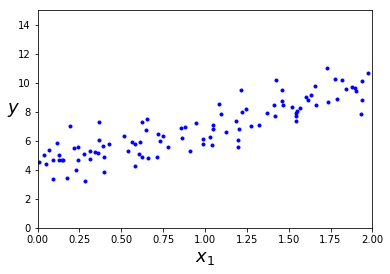

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#### 정규 방정식을 통해 $\theta$ 계산
* `np.linalg.inv()` : 역행렬을 계산한다.
* `dot()` : 행렬 곱셈을 한다.
> SVD를 사용하여 유사 역행렬을 구하는 Numpy `pinv()` 함수를 사용하면 `np.linalg.pinv(X_b).dot(y)` 같이 간단하게 계산할 수 있다.

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

> 이 데이터를 생성하기 위해 사용한 실제 함수는 $y = 4 + 3x_1 + \mbox{가우시안_노이즈}$이다.  
$\theta_0 = 4, \theta = 3$을 기대했지만 $\theta_0 = 4.215, \theta = 2.770$을 얻었다.  
매우 비슷하지만 노이즈 때문에 원래 함수의 파라미터를 정확하게 재현하지 못했다.

#### $\hat \theta$을 사용해 예측

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

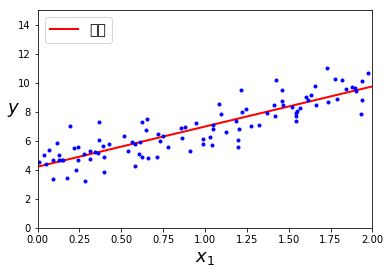

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

### 1.1.2. 정규 방정식을 사용하는 사이킷런 선형 회귀 코드

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수(least squares의 약자)를 사용하므로 직접 호출할 수 있다.

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

> 이 함수는 $\mathbf X^+ \mathbf y$을 계산한다.  
* $\mathbf X^+$ : **유사(의사) 역행렬**(pseudo inverse)(Moore-Penrose 유사역행렬이다).

## 1.2. 계산 복잡도
* 정규방정식은 $(n + 1) \times (n + 1)$ 크기가 되는 $\mathbf X^T \cdot \mathbf X$의 역행렬을 계산한다.
    * $n$ : 특성 수

#### 역행렬을 계산하는 **계산 복잡도**(computational complexity) 
* 일반적으로 $O(n^{2.4})$ \~ $O(n^3)$ 사이이다(구현 방법에 따라 차이가 있다).  
다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4}$ = $5.3$ \~ $2^3$ = $8$배로 증가한다.
> 역행렬을 계산하는 알려진 가장 빠른 방법은 코퍼스미스-위노그라드(Coppersmith-Winograd) 알고리즘을 사용한 방식이다.  
사이킷런의 `LinearRegression`에서 사용하는 `scipy.linalg.lstsq` 함수는 SVD 방법을 사용하여 유사 역행렬을 계산하며 $O(n^2)$의 복잡도를 가진다.

> **CAUTION**  
특성 수가 매우 많아지면(ex. 100,000개) 정규방정식이 매우 느려진다.

* 이 정규방정식의 복잡도는 다행히 훈련 세트의 샘플 수에는 선형적으로 증가한다.(즉, $O(m)$)  
그러므로 메모리 공간이 허락된다면 큰 훈련 세트도 효율적 처리가 가능하다.
> $\mathbf X$를 (샘플 수, 특성 수)인 $m \times n$ 행렬이라 할 때, $\mathbf X^T \cdot \mathbf X$는 $(n \times m)\cdot(m \times n) = (n \times n)$ 크기 행렬이 되므로 샘플 수($m$)가 역행렬 계산의 복잡도를 증가시키지 않고 점곱의 양만 선형적으로 증가시킨다.

* (정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀 모델은 예측이 매우 빠르다.  
예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다.  
다시 말해 예측하려는 샘플이 두 배로 늘어나면(또는 특성이 두 배로 늘어나면) 걸리는 시간도 거의 두 배 증가한다.

# 2. 경사 하강법
* 정규 방정식과는 아주 다르게 선형 회귀 모델을 훈련시키는 방법
* 특성이 매우 많고 훈련 샘플이 너무 많아 매모리에 모두 담을 수 없을 때 적합하다.

**경사 하강법**(GD, Gradient Descent)은 매우 일반적인 최적화 알고리즘으로 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

#### 경사 하강법의 원리
* 지면의 기울기만 느낄 수 있는 짙은 안개가 낀 산속에서 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것이다.

1. 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그래디언트(gradient, 비용 함수의 미분값)를 계산한다.
2. 그래디언트가 감소하는 방향으로 진행한다.  
그래디언트가 0이 되면 최솟값에 도달한 것이다.

#### 구체적으로 들여다보기
$\theta$를 임의의 값으로 시작해서(**무작위 초기화**(random initialization)라고 한다) 한 번에 조금씩 비용 함수(ex. MSE)가 감소하는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다.
<img src='images/gradient_descent.png'>

#### 학습률
경사 하강법에서 중요한 파라미터는 스텝(step)의 크기로, **학습률**(learning_rate) 하이퍼파라미터로 결정된다.
> 스텝 : 반복적인 학습 알고리즘에서 학습의 각 단계를 표현하는 말

#### 학습률이 너무 작을 때
알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.
<img src='images/small_learning_rate_for_gd.png'>

#### 학습률이 너무 클 때
골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모른다.  
이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다.
<img src='images/large_learning_rate_for_gd.png'>

#### 경사 하강법의 문제점 2가지 (전역 최솟값, 지역 최솟값)
모든 비용 함수가 매끈한 그릇과 같지 않다.  
패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵다.
<img src='images/problem_of_gd.png'>
> * **무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하는 경우**  
**전역 최솟값**(global minimum)보다덜 좋은 **지역 최솟값**(local minimum)에 수렴한다.
* **알고리즘이 오른쪽에서 시작하는 경우**  
평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

#### 선형 회귀를 위한 MSE 비용 함수
곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록 함수**(convex function)이다.
> * 볼록 함수 : 두 점을 이은 선분이 두 점 사이에서 항상 곡선 위에 위치할 경우
* 오목 함수 : 아래에 위치할 경우

* 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다.  
* 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다.

#### 특성 스케일에 따른 경사 하강법
비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다.
<img src='images/gd_scaled.png'>
> * **특성 1과 특성 2의 스케일이 같은 훈련 세트에 대한 경사 하강법 (왼쪽)**
    * 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다.
* **특성 1이 특성 2보다 더 작은 훈련 세트에 대한 경사 하강법 (오른쪽)**
    >> * 특성 1이 더 작기 때문에 비용 함수에 영향을 주기 위해서는 $\theta_1$이 더 크게 바뀌어야 한다.  
    그래서 $\theta_1$ 축을 따라서 길쭉한 모양이 된다.  
  * 비용 함수를 3차원 볼록 함수의 그릇 모양으로 생각하자.
* 처음엔 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골자기를 길게 돌아서 나간다.  
* 결국 최솟값에 도달하겠지만 시간이 오래 걸릴 것이다.
    
> **CAUTION**  
경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다(ex. 사이킷런의 `StandardScaler`를 사용하여).  
그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.
>> `StandardScaler` : 데이터의 각 특성에서 평균을 빼고, 표준편차로 나누어 평균 0, 분산 1로 만든다.

#### 파라미터 공간
위 그림은 모델 훈련이 (훈련 세트에서) 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일이며, 모델의 **파라미터 공간**(parameter space)에서 찾는다고 말한다.  
모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다.

## 2.1. 배치 경사 하강법
#### 경사 하강법 구현
경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트를 계산해야 한다.  
다시 말해 **편도 함수**(partial derivative)($\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지)를 계산해야 한다.  
이는 '동쪽을 바라봤을 때 느껴지는 산의 기울기는 얼마인가?, 북쪽을 바라봤을 때 느껴지는 산의 기울기는 얼마인가?'와 같다(3차원 이상의 세상이라 가정하면 다른 모든 차원에 대해서도 반복한다).

#### 파라미터 $\theta_j$에 대한 비용 함수의 편도함수
$$ {\partial\over\partial\theta_j} \mbox{MSE}(\theta) = 
{2\over m}\sum_{i=1}^m(\theta^T\cdot\mathbf x^i - y^i)x_j^i$$
> $ \mbox{MSE}(\mathbf X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^m(\theta^T \cdot \mathbf x^i - y^i)^2 $
* 공식을 $\theta_j$에 대해 편미분하면 미분 공식에 따라 지수가 곱셈으로 내려오고, 괄호 안의편미분이 추가로 곱해진다.  
* $\theta_j$에 대해 미분하므로 $\theta$의 나머지 파라미터 항은 상수로 취급되고 $x_j$만 곱해진다.  
* 곱하기 2는 학습률 $\eta$(뒤에 나옴)에 포함시켜 생각할 수 있어서 종종 비용 함수에 $\frac{1}{2}$을 곱한 다음, 편도함수에서는 2를 빼고 간단하게 표현하기도 한다.

#### 그래디언트 벡터
편도함수를 각각 계산하는 대신 그래디언트 벡터 $\nabla_{\theta}\mbox{MSE}(\theta)$는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도함수를 모두 담고 있다.
> 아래와 같이 행렬의 점곱으로 표현하면 곱셈 순서가 바뀌는 경우가 많다.  
$\mathbf X$는 $m \times n$ 행렬이므로 $n$개 파라미터를 가진 $n \times 1$ 벡터 $\theta$와 곱해서 $m \times 1$ 벡터를 만든다.  
같은 크기의 $\mathbf y$ 벡터를 빼고 $\mathbf X$ 자기 자신과 곱셈을 위해 $\mathbf X$ 행렬을 전치시켜 $n \times m$행렬로 바꿔 곱한다.  
결국 최종으로 파라미터 수와 같은 $n \times 1$ 벡터가 된다.

$$ \nabla_{\theta}\mbox{MSE}(\theta) = 
\begin{pmatrix}
\frac{\partial}{\partial\theta_0}\mbox{MSE}(\theta)\\
\frac{\partial}{\partial\theta_1}\mbox{MSE}(\theta)\\
\dots\\
\frac{\partial}{\partial\theta_n}\mbox{MSE}(\theta)
\end{pmatrix} = \frac{2}{m}\mathbf X^T \cdot (\mathbf X \cdot \theta - \mathbf y)$$
> **CAUTION**  
* 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 $\mathbf X$에 대해 계산하기 때문에 이 알고리즘을 **배치 경사 하강법**(Batch Gradient Descent)이라고 한다.  
* 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다.
* 특성 수에 민감하지는 않다.
    * 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식보다 경사 하강법을 사용하는 편이 훨씬 빠르다.
    
#### 경사 하강법 스텝
위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다.  
$\theta$에서 $\nabla_{\theta}\mbox{MSE}(\theta)$를 빼야하고, 이 때 학습률 $\eta$가 사용된다.  
$\eta$는 내려가는 스텝의 크기를 결정하기 위해 사용한다.

$$ \theta^{\mbox{next step}} = \theta - \eta\nabla_{\theta}\mbox{MSE}(\theta) $$

In [11]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.21509616],
       [2.77011339]])

> 정규방정식으로 찾은 것과 정확이 같다.  
경사 하강법이 완벽하게 작동했다.

In [12]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

#### 여러가지 학습률 $\eta$에 대한 경사 하강법

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

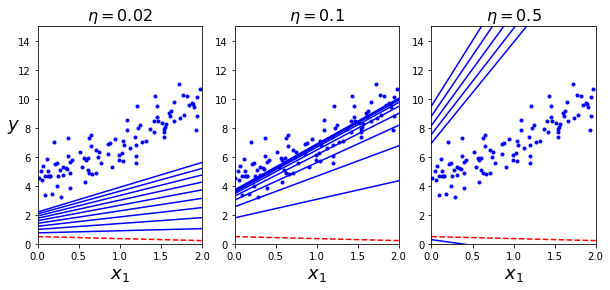

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

> * **왼쪽**  
학습률이 너무 낮다.  
알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것이다.
* **가운데**  
학습률이 아주 적당해보인다.  
반복 몇 번만에 이미 최적점에 수렴했다.
* **오른쪽**  
학습률이 너무 높다.  
알고리즘이 이리저리 널뛰면서 스텝마다 최적점에 점점 더 멀어져 발산한다.

#### 적절한 학습률
적절한 학습률을 찾으려면 그리드 탐색을 사용한다(2장 참조).  
하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

#### 반복 횟수
반복 횟수가 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춘다.  
너무 크면 모델 파라미터가 더 이상 변하지 않는 동안 시간을 낭비하게 된다.
* **해결책**
    * 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 $\epsilon$(**허용 오차**(tolerance))보다 작아지면 경사 하강법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지한다.

> **수렴율**  
비용 함수가 볼록 함수이고 기울기가 급격하게 바뀌지 않는 경우(MSE 비용 함수 같은), 학습률을 고정한 배치 경사 하강법은 어느 정도 시간이 걸리겠지만 결국 최적의 솔루션에 수렴할 것이다.  
비용 함수의 모양에 따라 달라지겠지만 $\epsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(\frac{1}{\epsilon})$의 **반복**이 걸릴 수 있다.  
다시 말해 (더 정확한 최솟값을 얻기 위해) 허용 오차 $\epsilon$을 $\frac{1}{10}$로 줄이면 알고리즘의 반복은 10배 늘어날 것이다.

## 2.2. 확률적 경사 하강법
배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산하기 때문에 큰 훈련 세트에서는 매우 느려진다는 것이다.

#### 확률적 경사 하강법
**확률적 경사 하강법**은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산한다.  
* 매 반복에서 매우 적은 데이터만 처리하기 때문에 알고리즘이 확실히 훨씬 빠르다.
* 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다(SGD는 외부 메모리 학습 알고리즘(1장 참조)으로 구현할 수 있다).
* 확률적이라 배치 경사 하강법보다 훨씬 불안정하다.
    * 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서  평균적으로 감소한다.
    * 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것이다.
    <img src='images/sgd.png'>
    * 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.

#### 불규칙한 비용 함수
비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.  
지역 최솟값에서 탈출시켜주는 것은 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점은 좋지 않다.

#### 해결법
학습률을 점진적으로 감소시키는 것이다.  
시작할 때는 학습률을 크게 하고(수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 한다), 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 된다.  

#### 학습 스케줄
* **학습 스케줄**(learning schedule)/**학습률 스케줄**(learning rate schedule) : 매 반복에서 학습률을 결정하는 함수
* 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수 있다.  
* 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있다.

#### 간단한 학습 스케줄을 사용한 확률적 경사 하강법 구현
일반적으로 한 반복에서 $m$(샘플 수)번 되풀이 되고, 이 때 각 반복을 **에포크**(epoch)라고 한다.

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

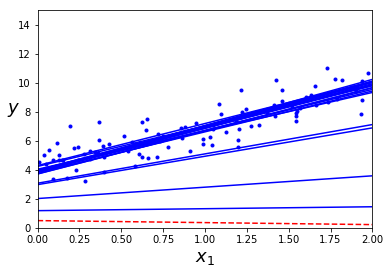

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()                                           

> 훈련 스텝의 첫 20개를 보여준다(스텝이 불규칙하게 진행한다).  

In [18]:
theta

array([[4.21076011],
       [2.74856079]])

> 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1,000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

#### 샘플 선택
샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다.  
알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고, 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.
> 사이킷런의 `SGDClassifier`와 `SGDRegressor`가 사용하는 방법

그러나 이렇게 하면 보통 더 늦게 수렴한다.

#### 사이킷런 `SGDRegressor`
`SGDRegressor` 클래스 : 기본값으로 제곱 오차 비용 함수를 최적화하며, SGD 방식으로 선형 회귀를 사용한다.

#### `SGDRegressor`를 이용한 선형 회귀
학습률 0.1(`eta0=0.1`), 기본 학습 스케줄(이전과는 다른)을 사용해 에포크를 50번 수행한다.  
규제는 미사용(`penalty=None`)
> * `learning_rate="invscaling"`(default)
    * 반복 횟수 $t$와 `eta0`(default 0.01), `power_t`(default 0.25) 두 매개변수를 사용한 공식으로 학습률을 계산한다.
$$ \eta^t = \frac{\mbox{eta0}}{t^{\mbox{power_t}}} $$
* `learning_rate='optimal'`
$$ \eta^t = \frac{1}{\mbox{alpha(t_0 + t)}} $$
    * t_0 : 페이스북 머신러닝 연구원 레옹 보투가 제안한 값, `alpha` 매개변수와 비용 함수에 따라 결정된다.

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=5, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10549653]), array([2.86315909]))

> 여기서도 정규방정식으로 구한 것과 매우 비슷한 값을 얻었다.

## 2.3. 미니배치 경사 하강법
각 스텝에서 **미니 배치**(Mini-batch)라 부르는 임의의 작은 샘플 세트(전체 훈련 세트(배치 경사 하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)이 아닌)에 대해 그래디언트를 계산한다.
* 확률적 경사 하강법에 비해 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 성능 을 향상시킬 수 있다.
* 미니배치를 어느 정도 크게하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다.  
    * 결국 SGD보다 최솟값에 더 가까이 도달하게 될 것이다.
    * 하지만 한편으로는 지역 최솟값에서 빠져나오기 더 힘들지도 모른다.
    
#### 미니배치 구현

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.25214635],
       [2.7896408 ]])

#### 3가지 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

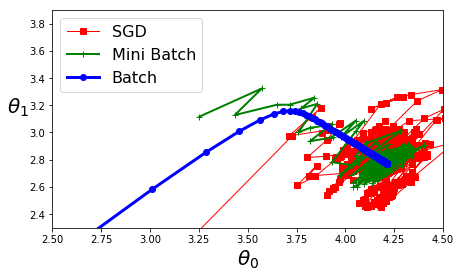

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, 
         label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, 
         label="Mini Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, 
         label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

> 모두 최솟값 근처에 도달했다.  
* 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있다.
* 그렇지만 배치 경사 하강법은 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니 배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달한다.

## 선형 회귀 모델을 사용한 정규방정식, 경사 하강법 알고리즘 비교
> * 정규방정식 : 선형 회귀만을 위한 알고리즘
* 경사 하강법 알고리즘 : 다른 여러 가지 모델도 훈련시킬 수 있다.

| 알고리즘 | $m$이 클 때 | 외부 메모리 학습 지원 | $n$이 클 때 | 하이퍼파라미터 수 | 스케일 조정 필요 | 사이킷런 |
|---------|------|--------|-----|------|-------|------|
| 정규방정식 | 빠름 | No | 느림 | 0 | No | `LinearRegression` |
| 배치 경사 하강법 | 느림 | No | 빠름 | 2 | Yes | `n/a` |
| 확률적 경사 하강법 | 빠름 | Yes | 빠름 | ≥2 | Yes | `SGDRegressor` |
| 미니배치 경사 하강법 | 빠름 | Yes | 빠름 | ≥2 | Yes | n/a |

> **NOTE**  
이 알고리즘들은 훈련 결과에 거의 차이가 없다.  
모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측한다.

> `SGDRegressor`와 `SGDClassifier`에서 `partial_fit()` 메서드로 모델 파라미터를 초기화하지 않고 미니배치 학습을 위해 반복적으로 호출할 수 있다.  
하지만 `partial_fit()` 메서드는 `fit()` 메서드와 동일하게 미니배치의 샘플을 하나씩 적용하므로 엄밀히 말하면 미니배치 경사 하강법 알고리즘은 아니다.